In [146]:
import numpy as np
from matplotlib import pyplot as plt
import sys

In [147]:
x = 1 + np.pow(2, -52.) # 52 digits of precision
print(x - 1)
y = 1 + np.pow(2, -53.)
print(y - 1)

2.220446049250313e-16
0.0


In [148]:
a = np.float64(1)
for i in range(1024):
    b = a * 2
    if np.isinf(b):
        print(a)
        print("2**{}".format(i))
        break
    a = b

8.98846567431158e+307
2**1023


C:\Users\danie\AppData\Local\Temp\ipykernel_26204\3253071314.py:3: RuntimeWarning: overflow encountered in scalar multiply
  b = a * 2


In [149]:
a = np.float64(0)
for i in range(1023, 0, -1):
    b = 2.**i
    if np.isinf(a + b):
        print(a)
        print("2**1023 + ... + 2**{}".format(i + 1))
        print("{} digits of precision".format(1023 - i - 1)) # Don't count the first bit
        break
    a += b

1.7976931348623157e+308
2**1023 + ... + 2**971
52 digits of precision


C:\Users\danie\AppData\Local\Temp\ipykernel_26204\2045271864.py:4: RuntimeWarning: overflow encountered in scalar add
  if np.isinf(a + b):


In [164]:
c = 299792458

def g(v):
    return c / np.sqrt(c**2 - v**2)

def k(m, v):
    if v >= 100:
        return (g(v) - 1) * m * c**2
    else:
        return 0.5 * m * v**2 * (1 + 0.75 * (v / c)**2) # With first relativistic correction

def k_rel(m, v):
    return (g(v) - 1) * m * c**2
def k_new(m, v):
    return 0.5 * m * v**2

In [165]:
objects = {
    'baseball': (150.e-3, 40.),
    'cosmic': (1.67e-27, (1.-1.e-15) * c),
    'walker': (70., 3.),
    'rbc': (0.1e-12, 1.e-3)
}

In [166]:
for name, (m, v) in objects.items():
    print(name)
    print("Gamma: {}".format(g(v)))
    print("KE: {}".format(k(m, v)))
    print("KE (relativistic, with fp errors): {}".format(k_rel(m, v)))
    print("KE (Newtonian): {}".format(k_new(m, v)))
    print()

baseball
Gamma: 1.0000000000000089
KE: 120.00000000000159
KE (relativistic, with fp errors): 119.73824315216554
KE (Newtonian): 120.0

cosmic
Gamma: 22597706.77646318
KE: 0.00339173745072592
KE (relativistic, with fp errors): 0.00339173745072592
KE (Newtonian): 7.504605742452413e-11

walker
Gamma: 1.0000000000000002
KE: 315.0
KE (relativistic, with fp errors): 1396.946170108598
KE (Newtonian): 315.0

rbc
Gamma: 1.0
KE: 5e-20
KE (relativistic, with fp errors): 0.0
KE (Newtonian): 5e-20



In [208]:
def bisect(f, a, b, its = 20):
    assert f(a) * f(b) < 0, "f(a) and f(b) must have opposite signs"
    c_hist = []
    for _ in range(its):
        c = 0.5 * (a + b)
        if f(c) == 0:
            c_hist.append(c)
            return c_hist
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        c_hist.append(c)
    return c_hist

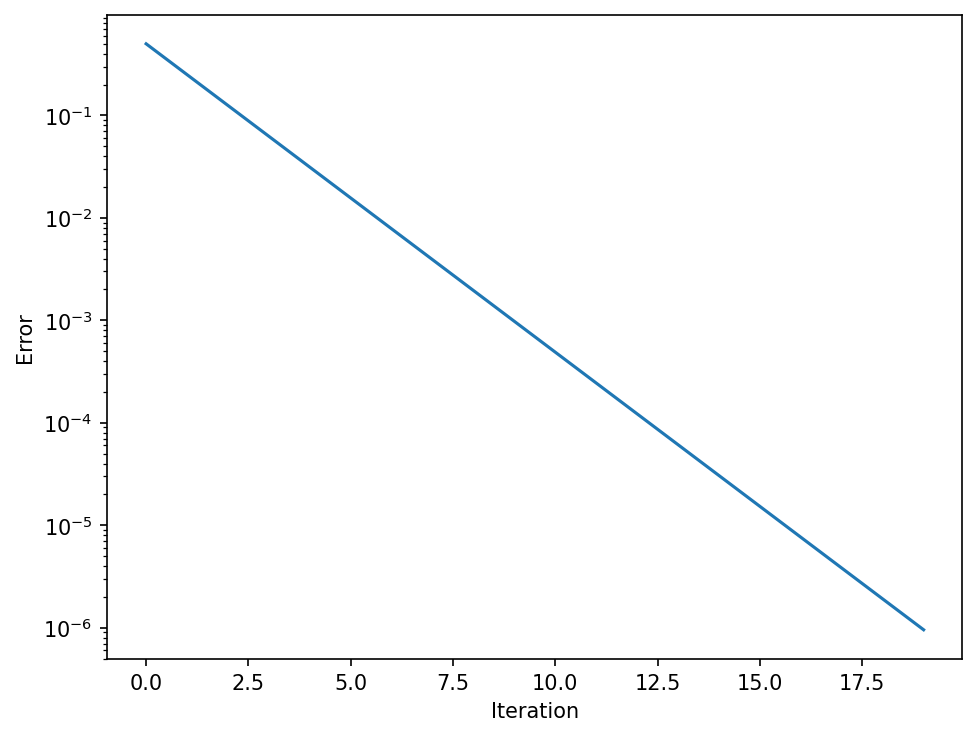

In [209]:
fig, ax = plt.subplots(dpi = 150, layout = "constrained")
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.yscale("log")
plt.plot(np.abs(bisect(lambda x: x, -1, 2)))

In [210]:
def newton_raphson(f, df, x0, its = 20):
    x_hist = [x0]
    for _ in range(its):
        x_hist.append(x_hist[-1] - f(x_hist[-1]) / df(x_hist[-1]))
    return x_hist

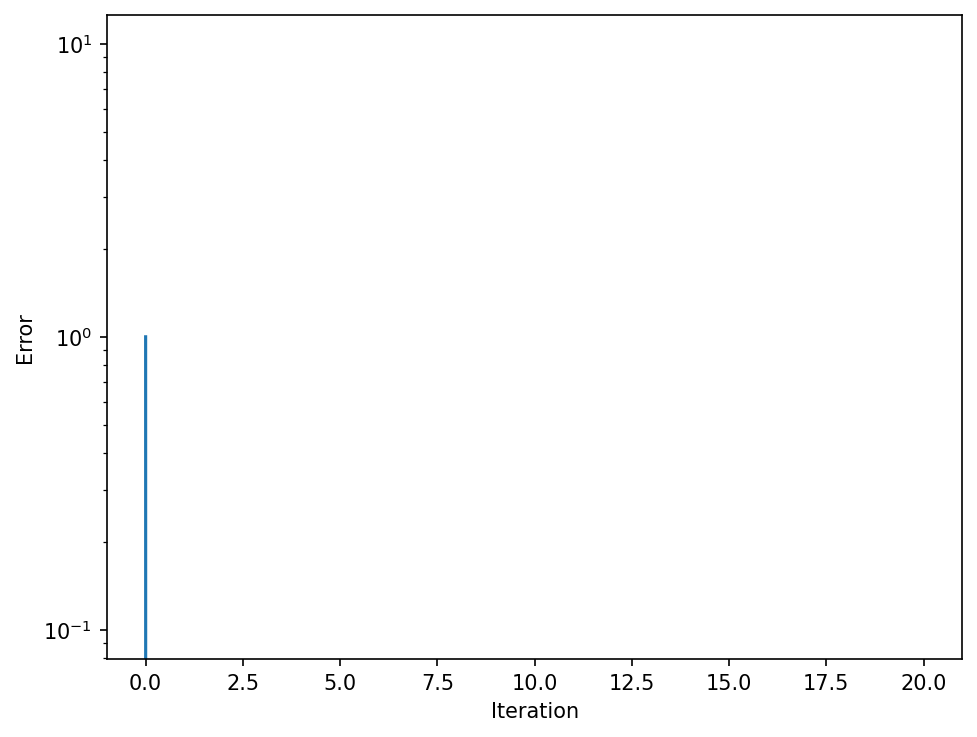

In [211]:
fig, ax = plt.subplots(dpi = 150, layout = "constrained")
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.yscale("log")
plt.plot(np.abs(newton_raphson(lambda x: x, lambda _: 1, 1)))

In [212]:
def f(x):
    return x**3 - 7 * x + 2
def df(x):
    return 3 * x**2 - 7

In [213]:
b_1 = np.array(bisect(f, 1, 3, its = 100))
nr_1 = np.array(newton_raphson(f, df, 3, its = 10))
root = nr_1[-1]

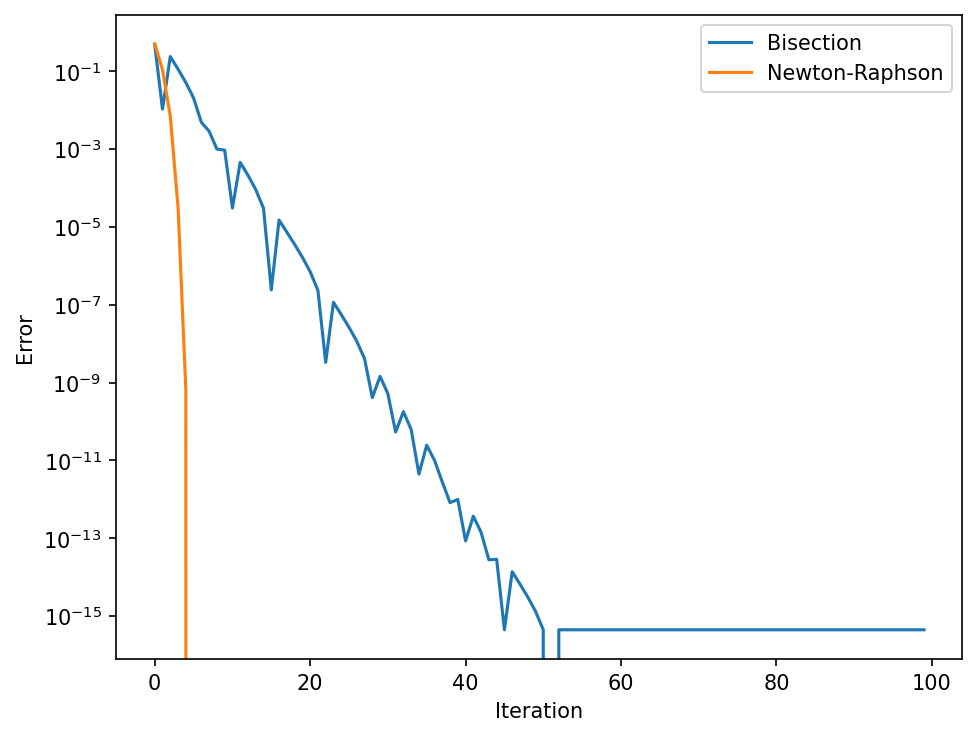

In [214]:
fig, ax = plt.subplots(dpi = 150, layout = "constrained")
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.yscale("log")
plt.plot(np.abs(b_1 - root), label = "Bisection")
plt.plot(np.abs(nr_1 - root), label = "Newton-Raphson")
plt.legend()

In [215]:
def f(x):
    return 49 * x**3 - 161 * x**2 - 440 * x + 1452
def df(x):
    return 147 * x**2 - 322 * x - 440

In [216]:
print(f(-4))
print(f(0))
print(f(4))

-2500
1452
252


In [217]:
bisect(f, -4, 4, its = 100)

[0.0, -2.0, -3.0]

In [218]:
b_1 = np.array(bisect(f, -4, 4, its = 100))
nr_1 = np.array(newton_raphson(f, df, 3, its = 10))
root = nr_1[-1]

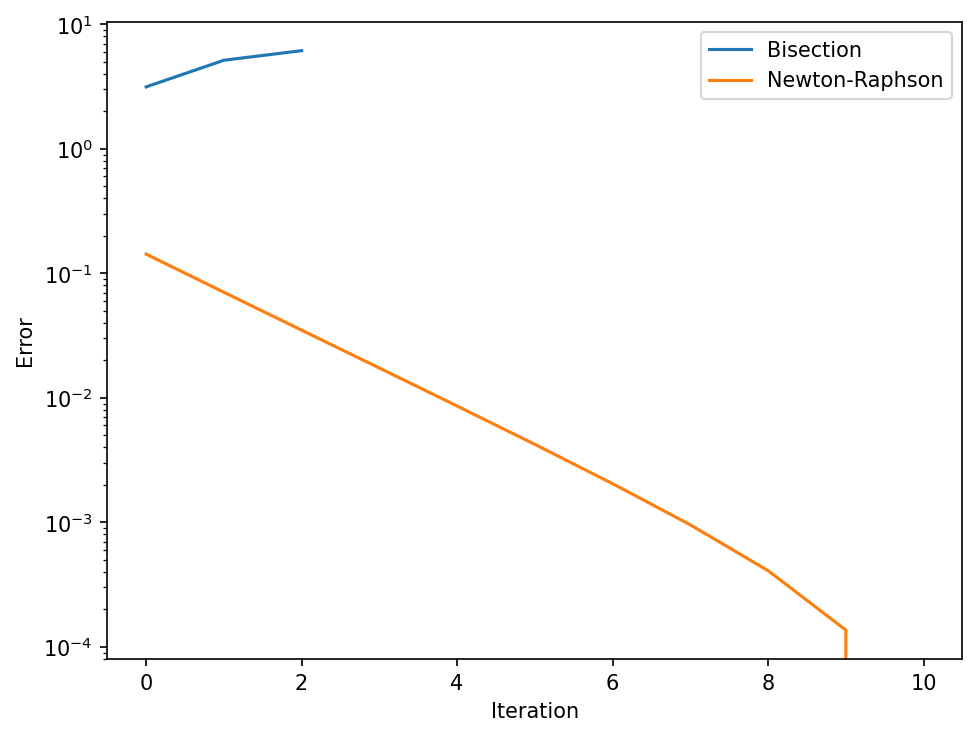

In [219]:
fig, ax = plt.subplots(dpi = 150, layout = "constrained")
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.yscale("log")
plt.plot(np.abs(b_1 - root), label = "Bisection")
plt.plot(np.abs(nr_1 - root), label = "Newton-Raphson")
plt.legend()